In [2]:
import sys
import pandas as pd
sys.path.insert(1, '/Users/yetchi/Desktop/vizStudy/project_libra/libra')
import main
from utils.metrics import *

data = pd.read_csv("./compression_info.csv")

data

ref = "/Users/yetchi/Desktop/vizStudy/project_libra/libra/eval/images/orig.png"

paths  = data["Paths"].tolist()


In [1]:
import pandas as pd
import sys
import cv2
sys.path.insert(1, '/Users/yetchi/Desktop/vizStudy/project_libra/libra')
from main import compute_metrics
from utils.metrics import *

# Load the data
data = pd.read_csv("compression_info.csv")
ref = "/Users/yetchi/Desktop/vizStudy/project_libra/libra/eval/images/input.png"
paths = data["Paths"].tolist()

color_spaces_to_use = ['RGB']

selected_metrics = {
    'SSIM': compute_ssim,
    'FSIM': compute_fsim,
    'MS-SSIM': compute_ms_ssim,
    'PSNR': compute_psnr,
    'VSI': compute_vsi,
    'SR-SIM': compute_srsim,
    'MS-GMSD': compute_msgmsd,
    "MDSI": compute_mdsi,
    "DSS": compute_dss,
    "IW-SSIM": compute_iw_ssim,
}

def resize_image(img, target_shape):
    return cv2.resize(img, (target_shape[1], target_shape[0]))

def compute_metrics_for_paths(distorted_images_paths, reference_image_path, selected_metrics, color_spaces_to_use):
    results = []

    ref_image = cv2.imread(reference_image_path)
    if ref_image is None:
        print(f"Error: Unable to load reference image from {reference_image_path}.")
        return None

    ref_shape = ref_image.shape[:2]  # Get the height and width of the reference image

    for dist_path in distorted_images_paths:
        dist_image = cv2.imread(dist_path)
        if dist_image is None:
            print(f"Error: Unable to load distorted image from {dist_path}. Skipping...")
            continue

        dist_image_resized = resize_image(dist_image, ref_shape)  # Resize distorted image to match ref_image

        for metric_name, metric_fn in selected_metrics.items():
            try:
                # Compute metric
                metric_value = metric_fn(dist_image_resized, ref_image)
                # Collect results
                results.append({
                    'Distorted_Image': dist_path,
                    'Reference_Image': reference_image_path,
                    'Metric': metric_name,
                    'Value': metric_value
                })
            except Exception as e:
                print(f"Error computing {metric_name} for {dist_path}: {e}")
                continue

    # Convert to DataFrame
    df = pd.DataFrame(results)

    # Pivot the DataFrame to have metrics as columns
    pivoted_df = df.pivot(index=['Distorted_Image', 'Reference_Image'], columns='Metric', values='Value').reset_index()

    return pivoted_df

# Compute metrics for paths
results_df = compute_metrics_for_paths(paths, ref, selected_metrics, color_spaces_to_use)

# Print or further process the pivoted DataFrame
print(results_df)


Metric                                    Distorted_Image  \
0       /Users/yetchi/Desktop/vizStudy/project_libra/l...   
1       /Users/yetchi/Desktop/vizStudy/project_libra/l...   
2       /Users/yetchi/Desktop/vizStudy/project_libra/l...   
3       /Users/yetchi/Desktop/vizStudy/project_libra/l...   
4       /Users/yetchi/Desktop/vizStudy/project_libra/l...   
5       /Users/yetchi/Desktop/vizStudy/project_libra/l...   
6       /Users/yetchi/Desktop/vizStudy/project_libra/l...   
7       /Users/yetchi/Desktop/vizStudy/project_libra/l...   
8       /Users/yetchi/Desktop/vizStudy/project_libra/l...   
9       /Users/yetchi/Desktop/vizStudy/project_libra/l...   
10      /Users/yetchi/Desktop/vizStudy/project_libra/l...   
11      /Users/yetchi/Desktop/vizStudy/project_libra/l...   
12      /Users/yetchi/Desktop/vizStudy/project_libra/l...   
13      /Users/yetchi/Desktop/vizStudy/project_libra/l...   
14      /Users/yetchi/Desktop/vizStudy/project_libra/l...   
15      /Users/yetchi/De

In [3]:
results_df.to_csv("output.csv", index=False)

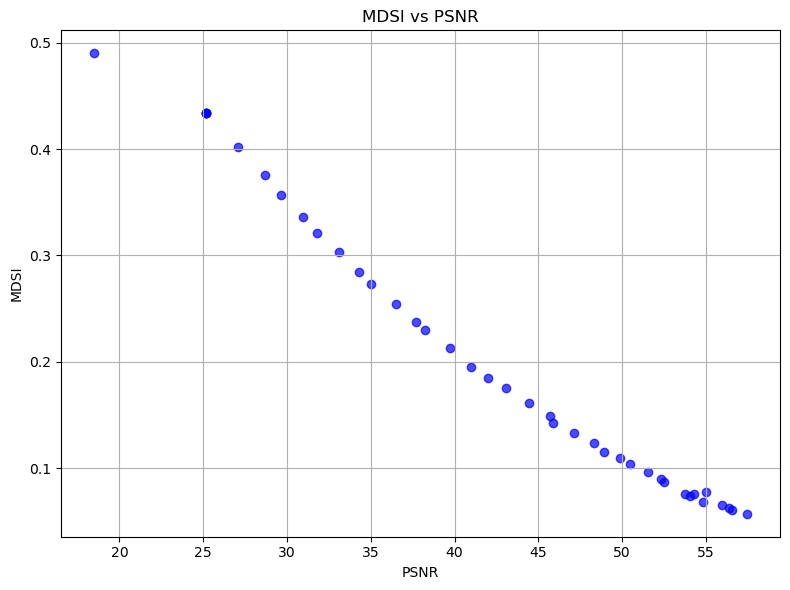

In [15]:
data = pd.read_csv("compression_info.csv")

data


X = data["PSNR"]
y = data["MDSI"]

import matplotlib.pyplot as plt
import numpy as np



# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7)

plt.title('MDSI vs PSNR')
plt.xlabel('PSNR')
plt.ylabel('MDSI')
plt.grid(True)
plt.tight_layout()



# Show plo
plt.show()


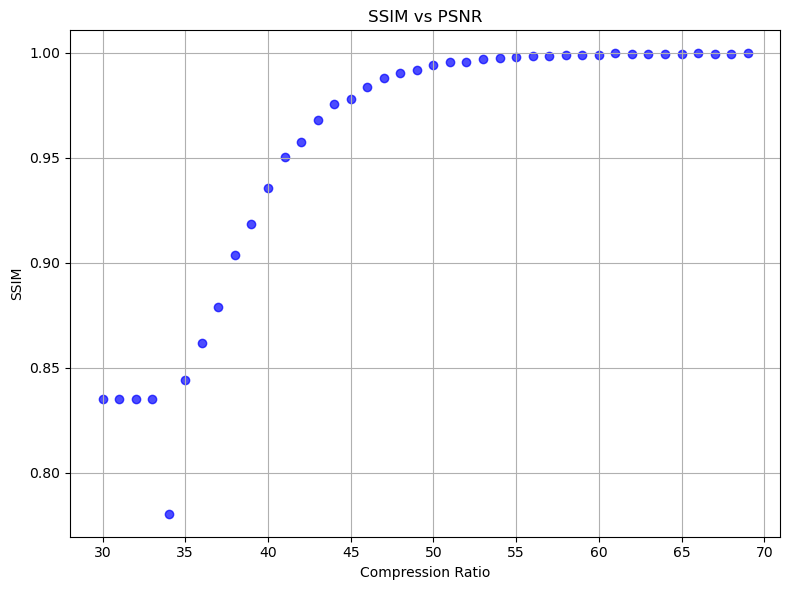

In [14]:
X = data["Threshold"]
y = data["SSIM"]

import matplotlib.pyplot as plt
import numpy as np



# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7)

plt.title('SSIM vs PSNR')
plt.xlabel('Compression Ratio')
plt.ylabel('SSIM')
plt.grid(True)
plt.tight_layout()



# Show plot
plt.show()

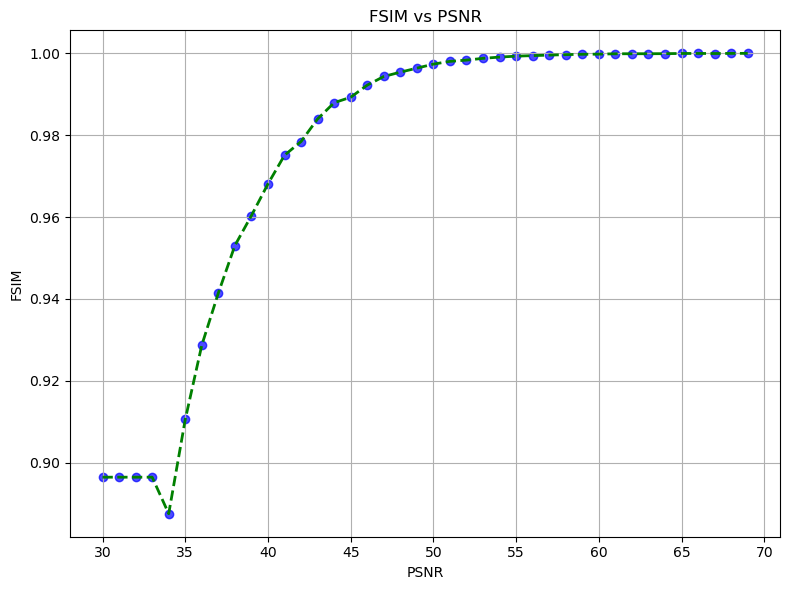

In [5]:


X = data["Threshold"]
y = data["FSIM"]

import matplotlib.pyplot as plt
import numpy as np



# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7)
plt.plot(X, y, color='green', linestyle='--', linewidth=2)
plt.title('FSIM vs PSNR')
plt.xlabel('PSNR')
plt.ylabel('FSIM')
plt.grid(True)
plt.tight_layout()



# Show plot
plt.show()


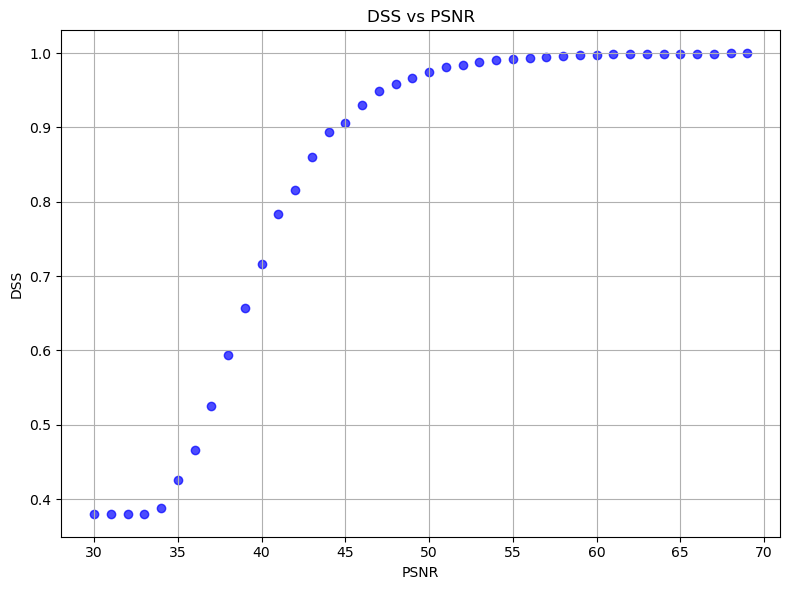

In [12]:
X = data["Threshold"]
y = data["DSS"]

import matplotlib.pyplot as plt
import numpy as np



# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7)

plt.title('DSS vs PSNR')
plt.xlabel('PSNR')
plt.ylabel('DSS')
plt.grid(True)
plt.tight_layout()



# Show plot
plt.show()

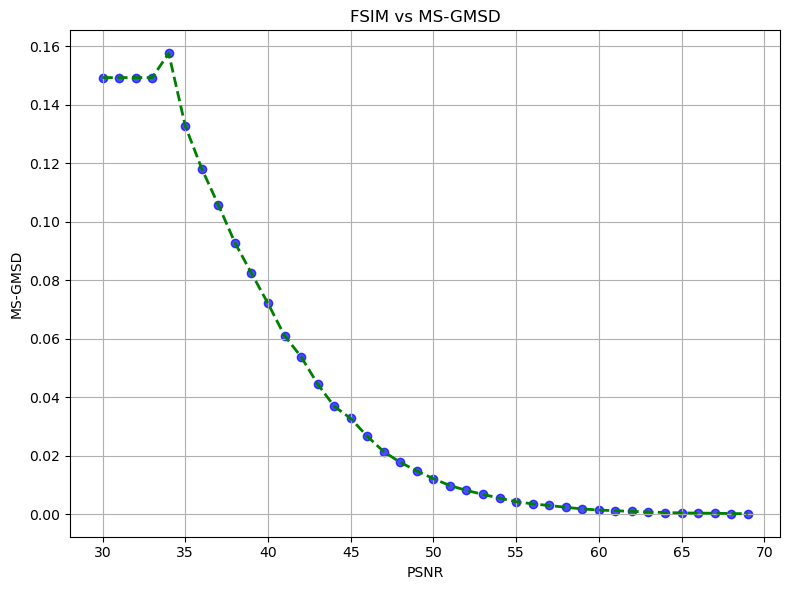

In [13]:
X = data["Threshold"]
y = data["MS-GMSD"]

import matplotlib.pyplot as plt
import numpy as np



# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7)
plt.plot(X, y, color='green', linestyle='--', linewidth=2)
plt.title('FSIM vs MS-GMSD')
plt.xlabel('PSNR')
plt.ylabel('MS-GMSD')
plt.grid(True)
plt.tight_layout()




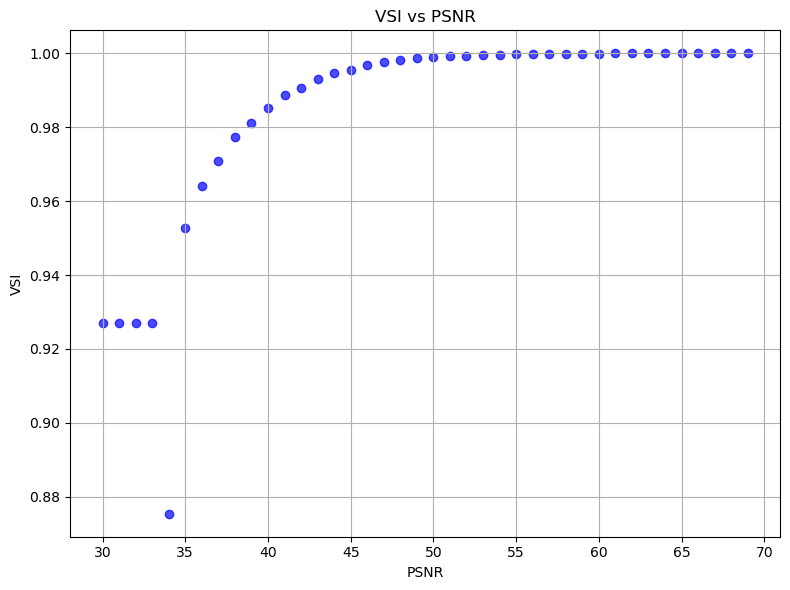

In [17]:
X = data["Threshold"]
y = data["VSI"]

import matplotlib.pyplot as plt
import numpy as np



# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7)

plt.title('VSI vs PSNR')
plt.xlabel('PSNR')
plt.ylabel('VSI')
plt.grid(True)
plt.tight_layout()



# Show plot
plt.show()